# Grundlagen von Netzwerken
Im Skript haben Sie die theoretischen Grundlagen von Netzwerken kennengelernt. Nun sollen Sie diese praktisch anwenden.

## Analyse eines Netzwerks von Terroristen

Als Datenbasis dient ein ungerichtetes Netzwerk von Terroristen, das im Nachgang des Anschlags auf das World Trade Center am 11.09.2001 rekonstruiert wurde. Das Netzwerk besteht aus den 19 Flugzeugentführern sowie weiteren Verbündeten in deren Umfeld. Die Kanten des Netzwerks stellen Bekanntschaftsbeziehungen zwischen den Terroristen dar.
Weitere Hintergrund-Informationen zum Terroristen-Netzwerk finden Sie im Paper "Mapping Networks of Terrorist Cells" von Valdis E. Krebs. Sie können die folgenden Aufgaben jedoch auch bearbeiten, ohne das Paper gelesen zu haben.

Bevor wir mit der Analyse des Netzwerks beginnen, müssen die für das Notebook benötigten Pakete importiert werden.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import pandas as pd

Der Datensatz des Terroristen-Netzwerks liegt in Form zweier csv-Files vor: **911_edgelist** und **911_nodes**.

Das File **911_edgelist.csv** stellt eine sogenannte Edgelist dar, die alle Kanten zwischen den beteiligten Knoten auflistet. Um sich einen Überblick über den Aufbau der Edgelist zu verschaffen, wird diese in ein Dataframe geladen:

In [2]:
G_911_df = pd.read_csv('./datasets/911_edgelist.csv', sep=';', 
                       header=None, names=['n1', 'n2'])
G_911_df.head()

,n1,n2
0,Madjid_Sahoune,Essid_Sami_Ben_Khemais
1,Seifallah_ben_Hassine,Tarek_Maaroufi
2,Seifallah_ben_Hassine,Essid_Sami_Ben_Khemais
3,Fahid_al_Shakri,Essid_Sami_Ben_Khemais
4,Samir_Kishk,Essid_Sami_Ben_Khemais


Jede Zeile des Dataframes steht für eine Kante zwischen den Knoten n1 und n2. Falls Sie sich das vollständige Dataframe ausgeben lassen, fällt Ihnen vielleicht auf, dass die Namen einiger Terroristen im Datensatz mit einem * gekennzeichnet sind. Dabei handelt es sich um Personen, deren Identität nicht eindeutig bestätigt werden konnte.

Auf Basis der Edgelist kann ein Graph in NetworkX erzeugt und visualisiert werden:

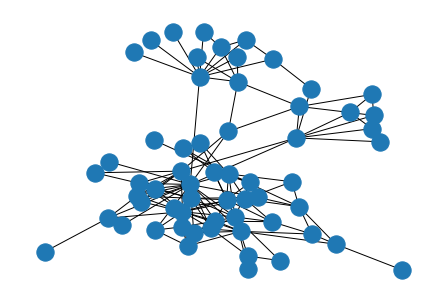

In [4]:
# create graph
G_911 = nx.from_pandas_edgelist(G_911_df, 'n1', 'n2')

# draw the graph G_911
nx.draw(G_911)

Mithilfe von **matplotlib** und **nx.draw_networkx()** kann der Graph größer und mit Bezeichnungen der Knoten visualisiert werden:

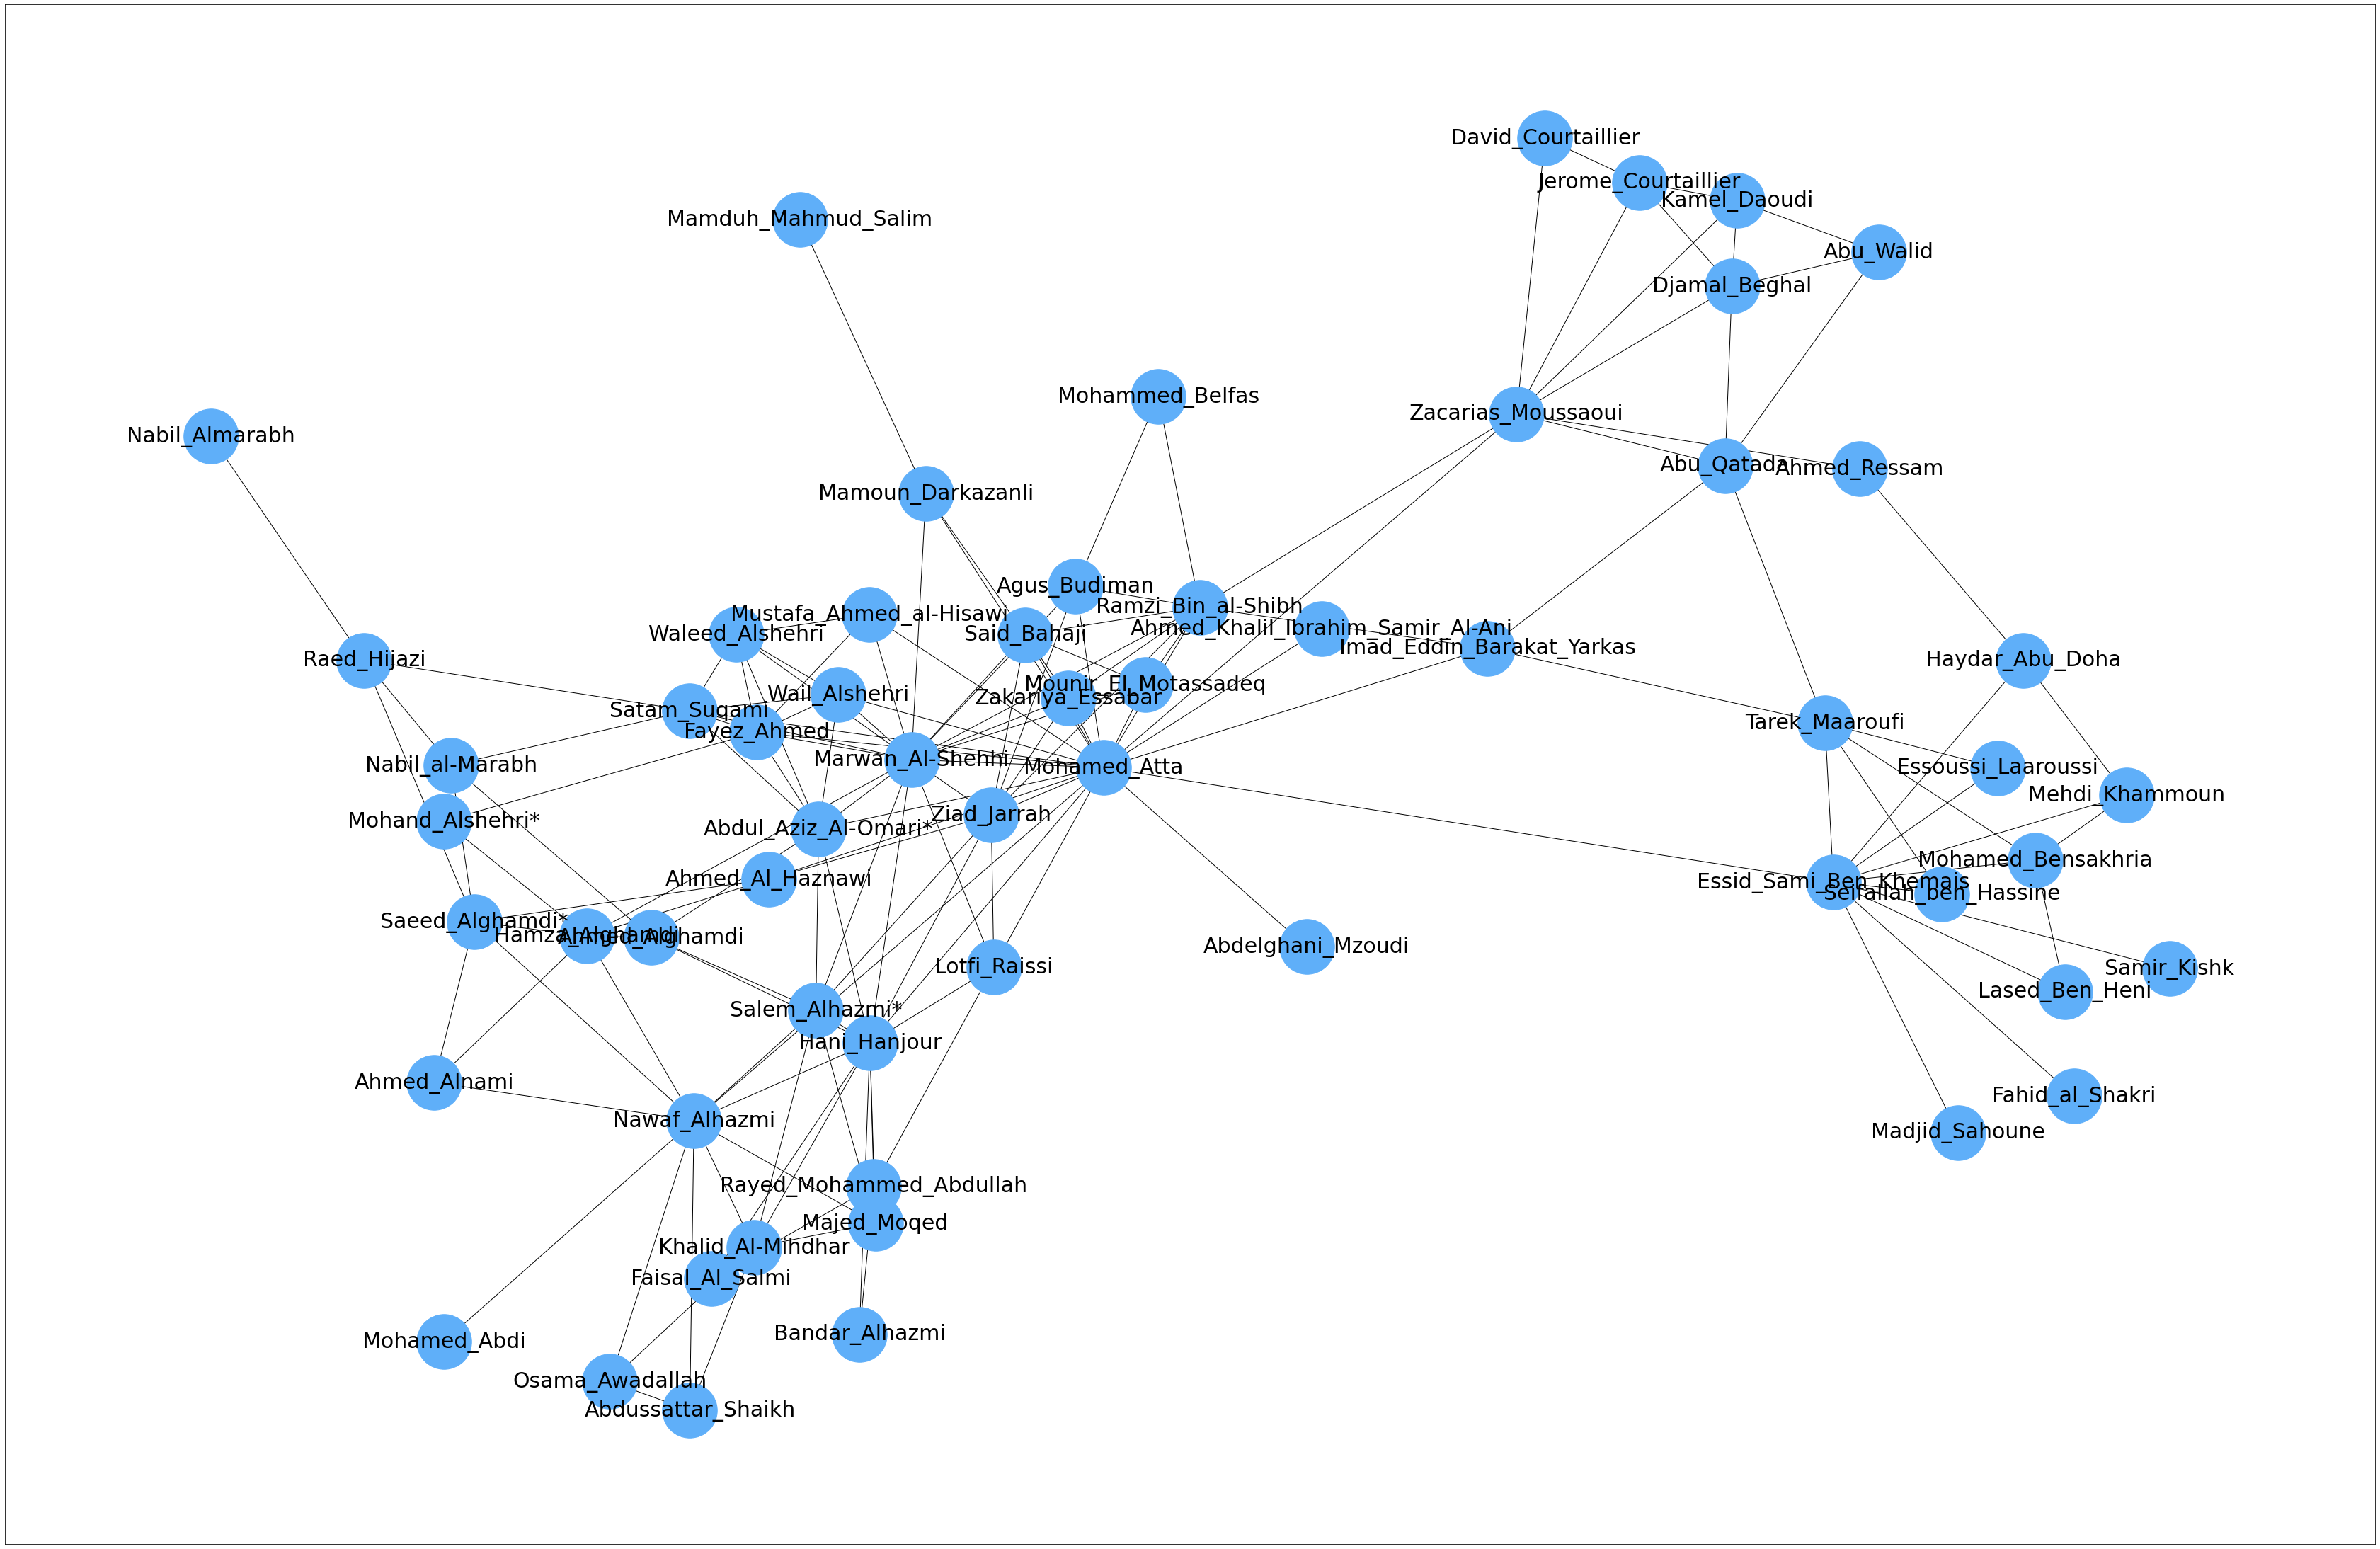

In [5]:
# draw the network G_911 with labels and bigger size
fig = plt.figure(figsize=(60, 40))
nx.draw_networkx(G_911, with_labels=True, node_size=6000, node_color='#5FAFF9', font_size=30)

Im nächsten Schritt wird das zweite File **911_nodes.csv** geladen. Dieses enthält zu jedem Knoten die Information, ob der jeweilige Terrorist an einer der Flugzeugentführungen beteiligt war oder nicht. Die Zugehörigkeit zu den Gruppen wird in Form einer Nummer von 1-5 angegeben, die wie folgt interpretiert werden kann:

- **1:** Flight AA #11 - Crashed into WTC North
- **2:** Flight AA #77 - Crashed into Pentagon
- **3:** Flight UA #93 - Crashed in Pennsylvania
- **4:** Flight UA #175 - Crashed into WTC South
- **5:** Other Associates

Die Informationen des Files werden in ein Dictionary geladen, sodass sie später dem Graphen in NetworkX hinzugefügt werden können: 

In [ ]:
nodes_911_dict = pd.read_csv('./datasets/911_nodes.csv', sep=';',
                             index_col=0, header=None, names=['node', 'ties']).to_dict('index')
print(nodes_911_dict)

Nun werden die Gruppenzugehörigkeiten den bestehenden Knoten des Graphen als sogenannte Node Attributes angehängt:

In [ ]:
nx.set_node_attributes(G_911, nodes_911_dict)

Nachdem der Graph nun mit allen relevanten Informationen vorliegt, können wir mit der ersten Aufgabe beginnen.

### Aufgabe 1
Lassen Sie sich mit graph.number_of_nodes() bzw. graph.number_of_edges() die Anzahl an Knoten bzw. Kanten des Graphen ausgeben.

In [ ]:
# Platz für Ihre Lösung

### Aufgabe 2
Finden Sie heraus, ob der der Terrorist Ahmed Alghamdi ein Flugzeug entführt hat und falls ja, welches.

**Tipp:** Prüfen Sie mit Graph.nodes['knoten']['attribut'] welchen Wert das Attribut "ties" des Knotens "Ahmed_Alghamdi" besitzt.

In [ ]:
# Platz für Ihre Lösung

Um die Korrektheit Ihrer Antwort zu überprüfen, können Sie die folgende Zelle ausführen, die den Graphen erneut inkl. Gruppenzugehörigkeit jedes Knotens darstellt.

In [ ]:
# create color map for nodes and ties
colors = []

for node in G_911:
    if G_911.nodes[node]['ties'] == 1:
        colors.append('#7189F7')
    elif G_911.nodes[node]['ties'] == 2:
        colors.append('#26EA5B')
    elif G_911.nodes[node]['ties'] == 3:
        colors.append('#F7F571')
    elif G_911.nodes[node]['ties'] == 4:
        colors.append('#F79A71')
    else: 
        colors.append('#71F1F7')
        
# draw the network G_911 with labels, bigger size and colors representing the ties
plt.figure(figsize=(60, 40))
nx.draw_networkx(G_911, with_labels=True, node_size=6000, node_color=colors, font_size=30)

# create data structures for legend
colors_distinct = ['#7189F7','#26EA5B','#F7F571','#F79A71','#71F1F7']
labels = ['1: Flight AA #11 - Crashed into WTC North','2: Flight AA #77 - Crashed into Pentagon',
          '3: Flight UA #93 - Crashed in Pennsylvania','4: Flight UA #175 - Crashed into WTC South',
          '5: Other Associates']
handles=[]

# manually define legend patches and append them to the handles list using list comprehension
[handles.append(mpatches.Patch(color=c, label=l)) for (c,l) in zip(colors_distinct, labels)]

# plot the legend
plt.legend(handles=handles, loc='upper left', prop={'size': 40})
plt.show()

### Aufgabe 3

Ermitteln Sie den kürzesten Pfad und die Entfernung zwischen den beiden Terroristen "Nabil_Almarabh" und "Abu_Walid"?

**Tipp:** Verwenden Sie nx.shortest_path() und nx.shortest_path.length().

In [ ]:
# Platz für Ihre Lösung

### Aufgabe 4

Welcher drei Knoten im Netzwerk besitzen die höchste normierte Degree Centrality?

**Tipp:** Verwenden Sie nx.degree_centrality(), sortieren Sie das Ergebnis absteigend nach der Degree Centrality und selektieren Sie anschließend die drei ersten Einträge.

In [ ]:
# Platz für Ihre Lösung

### Aufgabe 5

Welcher drei Knoten im Netzwerk besitzen die höchste normierte Closeness Centrality?

**Tipp:** Verwenden Sie nx.closeness_centrality(), sortieren Sie das Ergebnis absteigend nach der Closeness Centrality und selektieren Sie anschließend die drei ersten Einträge.

In [ ]:
# Platz für Ihre Lösung

### Aufgabe 6

Welcher drei Knoten im Netzwerk besitzen die höchste normierte Betweenness Centrality?

**Tipp:** Verwenden Sie nx.betweenness_centrality(), sortieren Sie das Ergebnis absteigend nach der Betweenness Centrality und selektieren Sie anschließend die drei ersten Einträge.

In [ ]:
# Platz für Ihre Lösung

### Aufgabe 7

Welcher Knoten ist basierend auf Ihren Ergebnissen der Aufgaben 4-6 der zentralste Knoten des Netzwerks? Wieso ist diese Person wichtig für das Netzwerk?

#### Antwort:
Platz für Ihre Lösung

### Aufgabe 8

Ermitteln Sie den Average Clustering Coefficient des Netzwerks sowie den Local Clustering Coefficient des Knotens aus Aufgabe 7. Interpretieren Sie die beiden erhaltenen Werte. Sollten Sie kein Ergebnis für Aufgabe 7 haben, wählen Sie für diese Aufgabe einen beliebigen Knoten.

**Tipp:** Verwenden Sie nx.average_clustering() und nx.clustering().

In [ ]:
# Platz für Ihre Lösung

### Aufgabe 9

Plotten Sie die Degree Distribution des Netzwerks und intepretieren Sie diese. Handelt es sich Ihrer Meinung nach um ein skalenfreies Netzwerk? 

In [ ]:
# Platz für Ihre Lösung

#### Interpretation:
Platz für Ihre Lösung

## Analyse der Eurovision Songcontest Abstimmung 2018
Nachdem Sie bereits das ungerichtete Terroristen-Netzwerk genauer analysiert haben, können Sie sich nun mit einem gerichteten und gewichteten Netzwerk vertraut machen. Der vorliegende Datensatz zeigt, welche Länder (Knoten) welche Punkte an andere Ländern im Rahmen des Eurovision Song Contest 2018 vergeben haben.
Im ersten Schritt wird der als Excel-Datei vorliegende Datensatz in ein Dataframe geladen.

In [ ]:
votes_data = pd.read_excel('./datasets/ESC2018_GF.xlsx',sheet_name='Combined result')
votes_data.head()

Im Dataframe sehen wir, dass die für eine Land eingehenden Kanten und deren Punkte in einzelnen Spalten abgetragen sind. Diese können mithilfe von pd.melt() in einzelne Zeilen, die für je eine Kante zwischen zwei Knoten stehen, abgetragen werden.

In [ ]:
votes_melted = votes_data.melt(
    ['Rank','Running order','Country','Total'],
    var_name = 'Source Country',value_name='points')

votes_melted.head(10)

Das entstandene Dataframe enthält auch Kanten für Länderkombinationen ohne Punktevergabe (points = 0). Um im Graphen nur relevante Kanten mit Punktevergabe darzustellen, werden die irrelevanten Kanten in der folgenden Code-Zelle entfernt.

In [ ]:
votes_melted = votes_melted[votes_melted.points != 0]

Auf Basis der entstandenen Edgelist kann nun der entsprechende Graph inkl. der Kantengewichte (Punkte) erzeugt werden.

In [ ]:
# create directed and weighted graph
G_euro = nx.from_pandas_edgelist(votes_melted, source='Source Country',
                                target='Country', edge_attr='points',
                                create_using=nx.DiGraph())

### Aufgabe 10

Visualisieren Sie den Graph G_euro mit nx.draw_networkx() ohne eine Anzeige der Labels.

In [ ]:
# Platz für Ihre Lösung

### Aufgabe 11

Berechnen Sie den einfachen In- bzw. Out-Degree (Anzahl eingehender bzw. ausgehender Kanten) sowie den gewichteten In- bzw. Out-Degree (Summe der Gewichte aller eingehenden bzw. ausgehenden Kanten) von Knoten 'Germany'. Wieso müssen alle Knoten des Netzwerks den gleichen gewichteten Out-Degree haben?

In [ ]:
# Platz für Ihre Lösung

### Aufgabe 12

Enthält das Netzwerk einen Euler-Pfad?

**Tipp:** Verwenden Sie nx.has_eulerian_path(). 

In [ ]:
# Platz für Ihre Lösung